## <b> Triple Exponential Smoothing
The triple exponential smoothing allows to capture seasonality with level and trend. The model captures trend and seasonality at time t. The coefficients α, β and γ represent the data smoothing factor, trend smoothing factor, and seasonality smoothing factor, respectively, with values between [0,1]. As triple exponential smoothing is applied for seasonal and trend time series, the values can be utilized to compute better starting values for the trend.

In [1]:
# Load modules
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv(
    '../Data Files/wisconsin-employment-time-series.csv'
)

# Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

# Let's see first 5 rows of it
wisc_emp.head(5)

Shape of the DataFrame: (178, 2)


,Month,Employment
0,1961-01,239.6
1,1961-02,236.4
2,1961-03,236.8
3,1961-04,241.5
4,1961-05,243.7


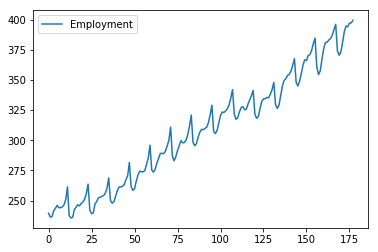

In [3]:
# plot the wisconsin employment dataset
wisc_emp.plot()

The preceding figure shows Wisconsin employee time series dataset. The dataset consists of both annual trend and monthly seasonality. We are aware about the seasonality pattern for data. Thus, seasonality information can be used to derive the initial value of trend as the average value across seasons.

In [4]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [5]:
# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))

    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

initialize_seasonalilty(wisc_emp['Employment'], 12)

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [6]:
# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)
wisc_emp.head(5)

,Month,Employment,TES
0,1961-01,239.6,239.600000
1,1961-02,236.4,235.789952
2,1961-03,236.8,240.710192
3,1961-04,241.5,246.880462
4,1961-05,243.7,248.544455


The triple exponential smoothing is controlled by α, β and γ. The presence or absence of any scenario will have a drastic effect on the outcome.

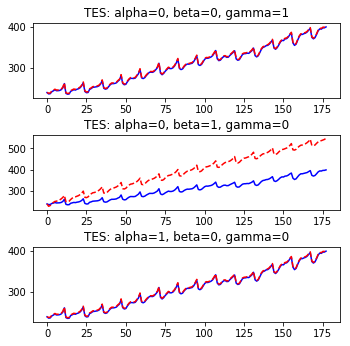

In [7]:
# Effect of alpha and beta
wisc_emp['TEF001'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 0, 1, 0)
wisc_emp['TEF010'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 1, 0, 0)
wisc_emp['TEF100'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 0, 0)



fig = plt.figure(figsize=(5.5, 5.5))

# Plot alpha=0, beta=0, gamma=1
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax) 
wisc_emp['TEF001'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=0, gamma=1')

# Plot alpha=0, beta=1, gamma=0
ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF010'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=0')

# Plot alpha=1, beta=0, gamma=0
ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF100'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=0')
fig.subplots_adjust(hspace=.5)

The preceding figure shows triple exponential smoothing using either data smoothing factor alpha or seasonality factor gamma set to one. Similarity plotting with respect to two parameters set to one is shown below

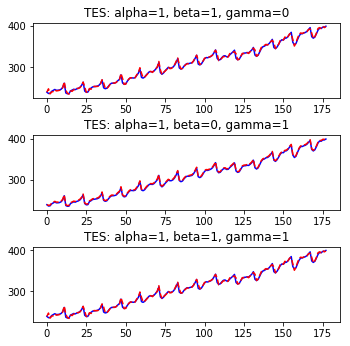

In [8]:
# Effect of alpha and beta
wisc_emp['TEF110'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 0, 0)
wisc_emp['TEF101'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 1, 0)
wisc_emp['TEF011'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 1, 0)


fig = plt.figure(figsize=(5.5, 5.5))

# Plot alpha=1, beta=1, gamma=0
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax) 
wisc_emp['TEF110'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=0')

# Plot alpha=1, beta=0, gamma=1
ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF101'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=1')

# Plot alpha=1, beta=1, gamma=1
ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF011'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=1')
fig.subplots_adjust(hspace=.5)

In [9]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F


# Function for Double exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

# First exponential smoothing
wisc_emp['SES'] = single_exp_smoothing(wisc_emp['Employment'], 0.8)
# Second exponential smoothing 
wisc_emp['DEF'] = double_exp_smoothing(wisc_emp['Employment'], 0.4, 0.7)
# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)
wisc_emp.head(5)

,Month,Employment,TES,TEF001,TEF010,TEF100,TEF110,TEF101,TEF011,SES,DEF
0,1961-01,239.6,239.600000,239.600000,239.600000,239.600000,239.600000,239.600000,239.600000,239.60000,239.600000
1,1961-02,236.4,235.789952,238.091667,228.501190,238.091667,247.682143,238.091667,247.682143,237.04000,233.200000
2,1961-03,236.8,240.710192,238.491667,232.007143,238.491667,235.385714,238.491667,235.385714,236.84800,232.448000
3,1961-04,241.5,246.880462,243.191667,239.963095,243.191667,239.935714,243.191667,239.935714,240.56960,236.411360
4,1961-05,243.7,248.544455,245.391667,246.454762,245.391667,241.100000,245.391667,241.100000,243.07392,241.710195


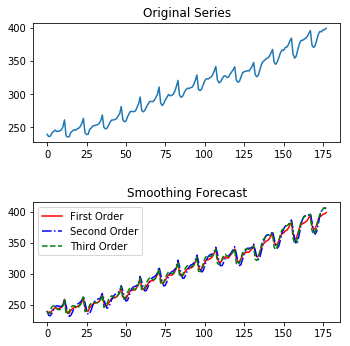

In [10]:
# Plot single, double and third exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Original Series')
ax = fig.add_subplot(2,1,2)
wisc_emp['SES'].plot(ax=ax, color='r', linestyle = '-', label = 'First Order')
wisc_emp['DEF'].plot(ax=ax, color='b', linestyle = '-.', label = 'Second Order')
wisc_emp['TES'].plot(ax=ax, color='g', linestyle = '--', label = 'Third Order')
ax.set_title('Smoothing Forecast')
plt.legend(loc="upper left")
fig.subplots_adjust(hspace=.5)

Single level using smoothing or seasonality is able to capture the data trend; thus, all models performed well as single and double exponential were able to use the smoothing factor to do forecasting and triple exponential smoothing is able to capture forecasts using either smoothing or seasonality factors.

Text(0.5,1,'Triple Smoothing Forecast')

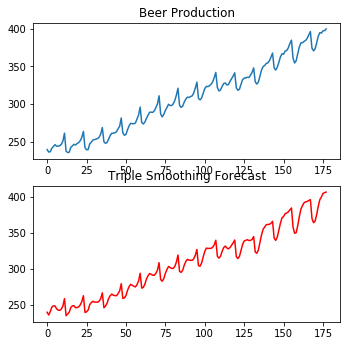

In [11]:
# Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')

This chapter covers exponential smoothing approaches to smoothen time series data. The approaches can be easily extended for the forecasting by including terms such as smoothing factor, trend factor, and seasonality factor.

- The single order exponential smoothing performs smoothing using only the smoothing factor.
- The second order smoothing factor by including the trend component.
- The third order smoothing was also covered, which incorporates all smoothing, trend, and seasonality factors        into the model.

Usually, higher-order exponential smoothing is not used in time as even for second order smoothing, the computation becomes very hard and approaches such as Autoregressive Integrated Moving Average (ARIMA) are utilized. It will be further discussed in next chapter.